<a href="https://colab.research.google.com/github/ArikusumaWardana/tesla-stock-predictions/blob/main/Tesla_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/stock.csv', parse_dates=['Date'], dayfirst=True)
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day

dataset.head(4)

<ipython-input-3-ef300eba5b86>:1: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dataset = pd.read_csv('/content/stock.csv', parse_dates=['Date'], dayfirst=True)


,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999,2010,6,29
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000,2010,6,30
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999,2010,7,1
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001,2010,7,2


In [ ]:
x = dataset.drop(['High', 'Date'], axis=1)
y = dataset['High']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
svr = SVR()
trained_model_svr = svr.fit(x_train, y_train)
SVR_Predicted = trained_model_svr.predict(x_test)

mse = mean_squared_error(y_test, SVR_Predicted)
print('Mean Squared Error:', mse)

Mean Squared Error: 4006.3909671295078


In [ ]:
test_date = dataset.iloc[y_test.index]['Date']

df = pd.DataFrame({'Date': test_date, 'Actual High': y_test, 'Predicted High': SVR_Predicted})

df = df.sort_values(by='Date')

df = df.reset_index(drop=True)


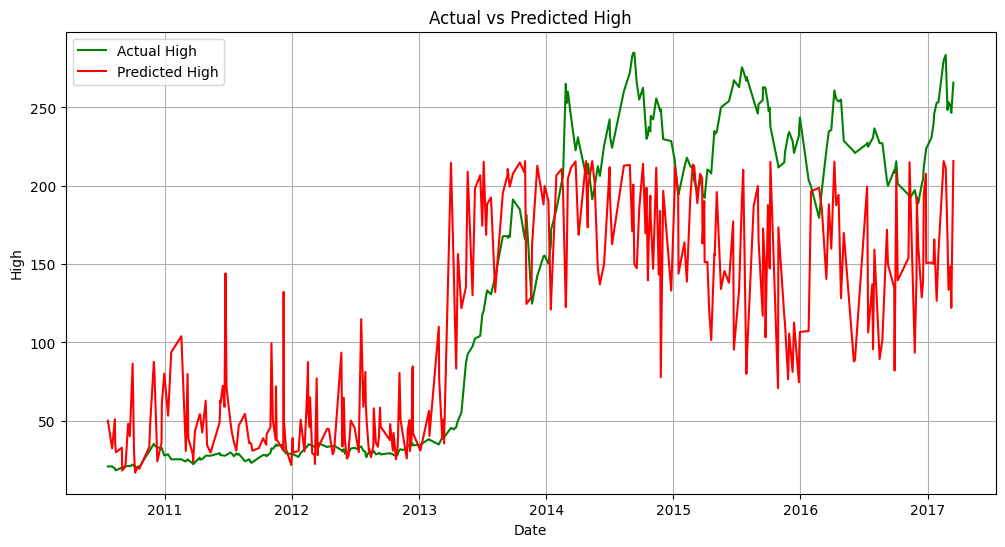

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Actual High'], label='Actual High', color='green')
plt.plot(df['Date'], df['Predicted High'], label='Predicted High', color='red')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Actual vs Predicted High')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
lr = LinearRegression()
trained_model_lr = lr.fit(x_train, y_train)
LR_Predicted = trained_model_lr.predict(x_test)

mse = mean_squared_error(y_test, LR_Predicted)
print('Mean Squared Error:', mse)

Mean Squared Error: 1.3441791932760685


In [ ]:
dfLR = pd.DataFrame({'Date': test_date, 'Actual High': y_test, 'Predicted High': LR_Predicted})

dfLR = dfLR.sort_values(by='Date')

dfLR = dfLR.reset_index(drop=True)

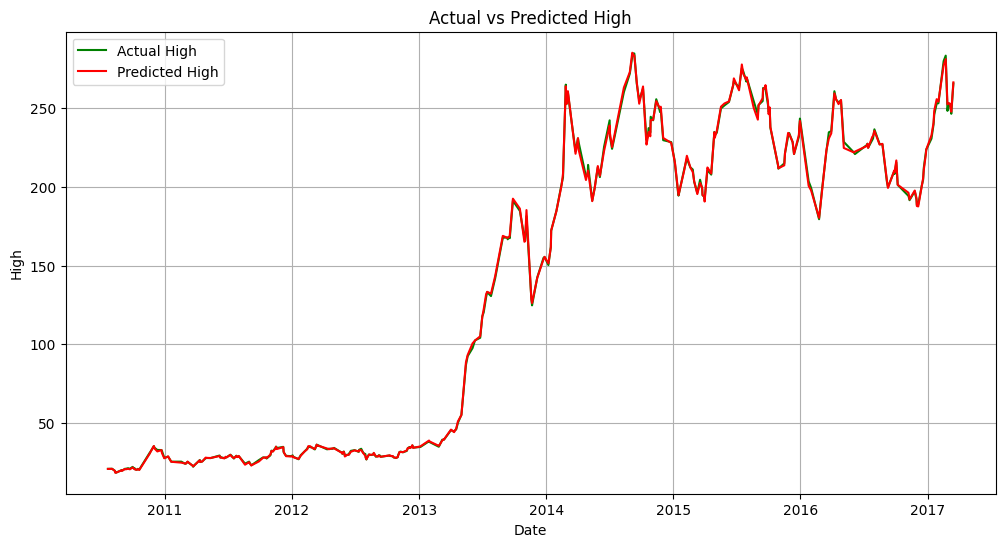

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dfLR['Date'], dfLR['Actual High'], label='Actual High', color='green')
plt.plot(dfLR['Date'], dfLR['Predicted High'], label='Predicted High', color='red')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Actual vs Predicted High')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
rf = RandomForestRegressor()
trained_model_rf = rf.fit(x_train, y_train)
RF_Predicted = trained_model_rf.predict(x_test)

mse = mean_squared_error(y_test, RF_Predicted)
print('Mean Squared Error:', mse)

Mean Squared Error: 1.9631873572149174


In [ ]:
dfRF = pd.DataFrame({'Date': test_date, 'Actual High': y_test, 'Predicted High': RF_Predicted})

dfRF = dfRF.sort_values(by='Date')

dfRF = dfRF.reset_index(drop=True)

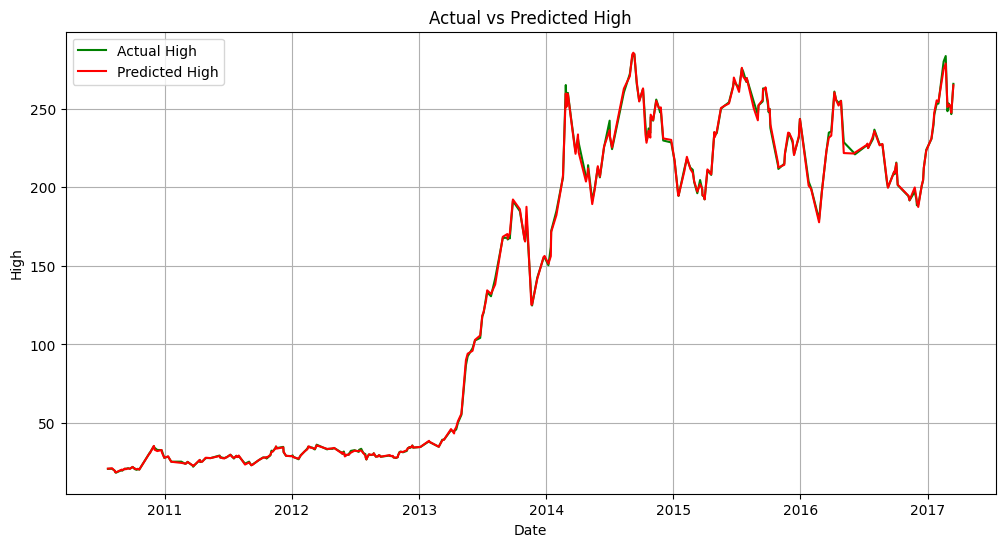

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dfRF['Date'], dfRF['Actual High'], label='Actual High', color='green')
plt.plot(dfRF['Date'], dfRF['Predicted High'], label='Predicted High', color='red')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Actual vs Predicted High')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
DTR = DecisionTreeRegressor()
trained_model_DTR = DTR.fit(x_train, y_train)
DTR_Predicted = trained_model_DTR.predict(x_test)

mse = mean_squared_error(y_test, DTR_Predicted)
print('Mean Squared Error:', mse)

Mean Squared Error: 4.398545081320816


In [ ]:
dfDTR = pd.DataFrame({'Date': test_date, 'Actual High': y_test, 'Predicted High': DTR_Predicted})

dfDTR = dfDTR.sort_values(by='Date')

dfDTR = dfDTR.reset_index(drop=True)

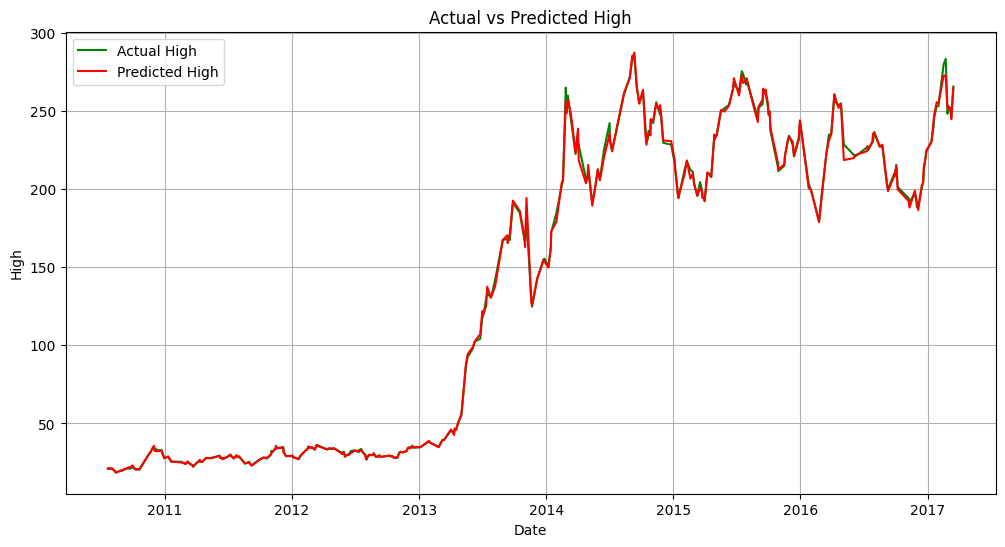

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dfDTR['Date'], dfDTR['Actual High'], label='Actual High', color='green')
plt.plot(dfDTR['Date'], dfDTR['Predicted High'], label='Predicted High', color='red')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Actual vs Predicted High')
plt.legend()
plt.grid(True)
plt.show()